In [1]:
import re
import os
import time
import pickle
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.sparse
from tqdm import tqdm, tqdm_notebook
from collections import defaultdict, OrderedDict
from matplotlib import pyplot as plt

from scipy.sparse import csr_matrix, coo_matrix, csc_matrix

### PUT YOUR PATH HERE (mine default is home/username/notebooks)
path_to_data = '../../shared_files/'

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [2]:
from sklearn.ensemble import IsolationForest

In [3]:
xtrain = np.load('xtrain.npy')
xtest = np.load('xtest.npy')
ytrain = np.load('ytrain.npy')
ytest = np.load('ytest.npy')

In [4]:
links_week_info = pd.read_csv('links_week_info.csv')

In [5]:
len(links_week_info), len(xtrain) + len(xtest)

(8216585, 3275293)

In [8]:
graph_trans_df = pd.read_csv('graph_trans_df.csv')

/home/const.belev/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
id_of_first_viable_transaction = graph_trans_df.ID[graph_trans_df.seconds_from_start >= 7*86400].iloc[0]

482796

In [31]:
trans_graph = graph_trans_df[~graph_trans_df.id_sender.isnull() & ~graph_trans_df.id_receiver.isnull()]

In [41]:
first_viable_trans_iloc = np.where(trans_graph.seconds_from_start.values >= 7*86400)[0][0]

In [12]:
trans_links = links_week_info[~graph_trans_df.id_sender.isnull() & ~graph_trans_df.id_receiver.isnull()]

In [16]:
links_values = trans_links.drop('ID', 1).values.astype(np.float32)

In [18]:
links_train, links_test = links_values[:len(xtrain)], links_values[len(xtrain):]

In [42]:
isof = IsolationForest(n_estimators=50, contamination = (ytrain == 1).mean(), n_jobs=-1, verbose=1)

In [43]:
isof.fit(links_train[first_viable_trans_iloc:])

[Parallel(n_jobs=32)]: Done   2 out of  32 | elapsed:    0.6s remaining:    9.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    4.5s finished


IsolationForest(bootstrap=False, contamination=0.01012951949771122,
        max_features=1.0, max_samples='auto', n_estimators=50, n_jobs=-1,
        random_state=None, verbose=1)

In [44]:
links_scores_train = isof.decision_function(links_train[first_viable_trans_iloc:])
links_scores_test = isof.decision_function(links_test)

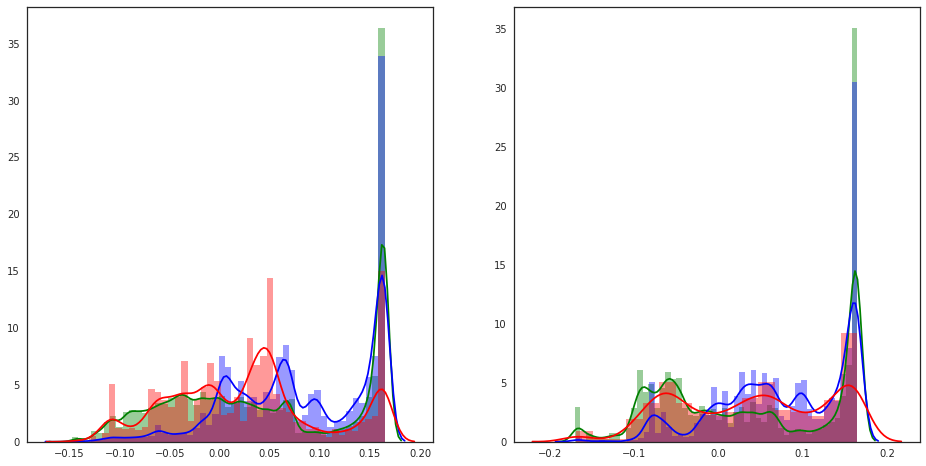

In [46]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(links_scores_train[ytrain[first_viable_trans_iloc:] == t], color=c, ax=axes[0])

for c, t in zip(colors, targets):
    sns.distplot(links_scores_test[ytest == t], color=c, ax=axes[1])

In [ ]:
isof = IsolationForest(n_estimators=1000, contamination = (ytrain == 1).mean(), n_jobs=-1, verbose=1)

In [ ]:
isof.fit(xtrain)

In [ ]:
train_scores = isof.decision_function(xtrain)

In [ ]:
test_scores = isof.decision_function(xtest)

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(train_scores[ytrain == t], color=c)

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(test_scores[ytest == t], color=c)

In [ ]:
train_scores

In [ ]:
isof_num = IsolationForest(n_estimators=1000, contamination = (ytrain == 1).mean(), n_jobs=-1, verbose=1)

In [ ]:
isof.fit(xtrain[:, -7:])

In [ ]:
train_partial_scores = isof.decision_function(xtrain[:, -7:])
test_partial_scores = isof.decision_function(xtest[:, -7:])

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(train_partial_scores[ytrain == t], color=c)

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(test_partial_scores[ytest == t], color=c)

In [ ]:
isof_num_wo_baseamount = IsolationForest(n_estimators=100, contamination = (ytrain == 1).mean(), n_jobs=-1, verbose=1)

In [ ]:
kek = xtrain[:, -4:-1]
isof_num_wo_baseamount.fit(kek)
train_num_wo_baseamount = isof_num_wo_baseamount.decision_function(kek)
test_num_wo_baseamount = isof_num_wo_baseamount.decision_function(xtest[:, -4:-1])

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(train_num_wo_baseamount[ytrain == t], color=c, ax=axes[0])

for c, t in zip(colors, targets):
    sns.distplot(test_num_wo_baseamount[ytest == t], color=c, ax=axes[1])

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(train_num_wo_baseamount[ytrain == t], color=c)

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(test_num_wo_baseamount[ytest == t], color=c)

In [ ]:
isof_num_baseamount = IsolationForest(n_estimators=100, contamination = (ytrain == 1).mean(), n_jobs=-1, verbose=1)

In [ ]:
isof_num_baseamount.fit(xtrain[:, -1:])
train_num_baseamount = isof_http://localhost:9999/notebooks/anomaly_detection.ipynb#num_baseamount.decision_function(xtrain[:, -1:])
test_num_baseamount = isof_num_baseamount.decision_function(xtest[:, -1:])

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(train_num_baseamount[ytrain == t], color=c)

In [ ]:
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(test_num_baseamount[ytest == t], color=c)

In [ ]:
f, axes = plt.subplots(1, 2)
colors = ['g', 'b', 'r']
targets = [-1, 0, 1]
for c, t in zip(colors, targets):
    sns.distplot(np.log1p(xtrain[:, -5])[ytrain == t], color=c, ax=axes[0])

for c, t in zip(colors, targets):
    sns.distplot(np.log1p(xtest[:, -5])[ytest == t], color=c, ax=axes[1])

In [50]:
xtrain_wo = np.c_[xtrain[:, :-5], xtrain[:, -4:]]
xtest_wo = np.c_[xtest[:, :-5], xtest[:, -4:]]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM

In [ ]:
svc_detector = OneClassSVM(kernel='linear', random_state=42)
svc_detector.fit(xtrain_wo)

In [62]:
svc_clf = LinearSVC(dual=False, class_weight='balanced', random_state=42, verbose=2)
svc_clf.fit(xtrain_wo, (ytrain == 1).astype(int))

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=2)

In [63]:
svc_train_pred = svc_clf.predict(xtrain_wo)
svc_test_pred = svc_clf.predict(xtest_wo)

In [56]:
svc_dec = svc_clf.decision_function(xtrain_wo)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve

In [65]:
confusion_matrix(svc_test_pred, ytest == 1)

array([[912201,   1571],
       [ 65492,   3324]])

In [70]:
precision_score(ytest == 1, svc_test_pred), recall_score(ytest == 1, svc_test_pred), f1_score(ytest == 1, svc_test_pred)

(0.048302720297605205, 0.6790602655771195, 0.09019006661149624)

In [68]:
(ytrain == 1).mean()

0.01012951949771122

In [69]:
(ytest == 1).mean()

0.004981742093329045

In [78]:
kek = np.concatenate([ytrain, ytest], 0)

In [79]:
anom_rate = np.cumsum(kek == 1) / np.arange(1, len(kek) + 1)

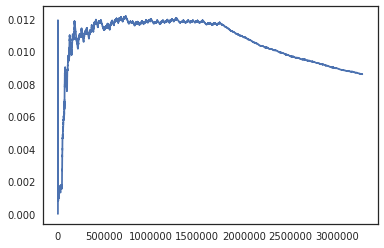

In [80]:
plt.plot(anom_rate)